<a href="https://colab.research.google.com/github/anikettarora/Music-Sentiment-Analysis/blob/main/Music_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/MusicSent/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d deepshah16/song-lyrics-dataset

In [ ]:
import zipfile
with zipfile.ZipFile('/content/song-lyrics-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ArtistsCSV')

print('Data source import complete.')


<center><img src="https://i.redd.it/n69aymdd0ls21.jpg" alt="Description of the image"> </center>
<center> <h1> 🎵🎵Sentiment Analysis of Music Artists🎵🎵</h1> </center>

# **Importing Library**

In [ ]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

<ipython-input-4-f1dd137a4a07>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Importing all data**
>📌**Note**: Importing all singers separately

In [ ]:
df_dr=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/Drake.csv')
df_b=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/Beyonce.csv')
df_be=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/BillieEilish.csv')
df_ed=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/EdSheeran.csv')
df_j=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/JustinBieber.csv')
df_dl=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/DuaLipa.csv')
df_l=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/LadyGaga.csv')
df_m5=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/Maroon5.csv')
df_p=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/PostMalone.csv')
df_r=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/Rihanna.csv')
df_cb=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/csv/CardiB.csv')
df_all=[df_dr,df_b,df_be,df_ed,df_j,df_dl,df_l,df_m5,df_p,df_r,df_cb]

# **Cleaning**
>📌**Note**: Removing the nan values,unreleased albums and songs sung in any other language than english.
* Lyrics to words -> To convert all the Lyrics to word
* To word -> Converts all the words and removes all the repetative words
*  Count word -> This function can count all the unique and as well non unique words
*  Word stats -> To give the statistics of words.


In [ ]:
def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word

    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [ ]:
def toword(df):
    def unique(list1):
       # intilize a null list
         unique_list = []
       # traverse for all elements
         for x in list1:
             # check if exists in unique_list or not
             if x not in unique_list:
                  unique_list.append(x)
         return unique_list

    #Stores unique words of each lyrics song into a new column called words
    #list used to store the words
    words = []
    #iterate trought each lyric and split unique words appending the result into the words list
    df = df.reset_index(drop=True)
    for word in df['Lyric'].tolist():
        words.append(unique(lyrics_to_words(word).split()))
    #create the new column with the information of words lists
    df['words'] = words
    return df

In [ ]:
def cleaning(df):
    a=[]
    i=0
    df1=df
    title = df['Title']
    for t in df['Title']:
        r=Re=l=Li=c=m=V=ve=D=rs=0
        r=t.find('remix')
        Re=t.find('Remix')
        l=t.find('live')
        Li=t.find('Live')
        V=t.find('Version')
        ve=t.find('version')
        D=t.find('Demo ')
        D=t.find('Demo')
        rs=t.find('Reprise')
        c=t.find('COPY')
        m=t.find('Mix')
        if r != -1:
            a.append(t)
        elif Re != -1:
            a.append(t)
        elif l != -1:
            a.append(t)
        elif Li != -1:
            a.append(t)
        elif V != -1:
            a.append(t)
        elif ve != -1:
            a.append(t)
        elif D != -1:
            a.append(t)
        elif rs != -1:
            a.append(t)
        elif c != -1:
            a.append(t)
        elif m != -1:
            a.append(t)

    for t1 in df['Title']:
        for t2 in a:
            if t1 == t2:
                df1=df1.drop(i)
        i=i+1

    df1.dropna(subset = ["Title"], inplace=True)
    df1.dropna(subset = ["Lyric"], inplace=True)
    df1.drop_duplicates(subset ="Title",keep = False, inplace = True)
    df1.drop_duplicates(subset ="Lyric",keep = False, inplace = True)


    return df1

In [ ]:
def countword(df):

    c=[]
    for word in df['words']:
        for w in word:
            c.append(w)
    return c


In [ ]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    name = []

    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        name.append(str(value))
        total_news.append(main_df['name'][main_df['name']==value].count())
        data = pd.DataFrame({'name':name,
                          'unique words':unique_words,
                          'total words':total_words,
                          'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [ ]:
df_allc=[]
for df in df_all:
    df_c=cleaning(df)
    df_w=toword(df_c)
    df_allc.append(df_w)

frames=df_allc
df_main = pd.concat(frames,ignore_index=True)
df_main= df_main.drop(df_main[(df_main.Year < 1000) | (df_main.Year > 2021)].index)
df_main= df_main.drop(['Unnamed: 0'],axis=1)
df_main=df_main.reset_index(drop=True)
df_main

Artist                      Title                 Album    Year  \
0       Drake                 God’s Plan              Scorpion  2018.0   
1       Drake             In My Feelings              Scorpion  2018.0   
2       Drake              Hotline Bling                 Views  2015.0   
3       Drake                  One Dance                 Views  2016.0   
4       Drake  Hold On, We’re Going Home  Nothing Was the Same  2013.0   
...       ...                        ...                   ...     ...   
2095  Cardi B              Won’t change*                   NaN  2020.0   
2096  Cardi B            Up (Radio Edit)                   NaN  2021.0   
2097  Cardi B          Cardi B’s Tattoos                   NaN     NaN   
2098  Cardi B      The Good (Unreleased)                   NaN     NaN   
2099  Cardi B                   Nobody 2                   NaN  2020.0   

            Date                                              Lyric  \
0     2018-01-19  and they wishin' and wishin' and wishin' and w...   
1     2018-06-29  drake trap trapmoneybenny this shit got me in ...   
2     2015-07-25  you used to call me on my you used to you used...   
3     2016-04-05  kyla baby i like your style   drake grips on y...   
4     2013-08-07  produced by nineteen85 majid jordan  noah 40 s...   
...          ...                                                ...   
2095  2020-04-01  snippet lyrics i won't change for nobodynobody...   
2096  2021-02-05  up up up ayy up uh up look this is fire   once...   
2097         NaN  faceneckhand  red star right armloyalty over r...   
2098         NaN  whats this now how could this happen after eve...   
2099  2020-07-22  bobby now used to cooking shit ive been slappi...   

                                                  words  
0     [wishin, yeah, movin, calm, start, trouble, tr...  
1     [drake, trap, trapmoneybenny, shit, got, feeli...  
2     [used, call, yeah, cell, phone, latenight, nee...  
3     [kyla, baby, like, style, drake, grip, waist, ...  
4     [produced, nineteen85, majid, jordan, noah, 40...  
...                                                 ...  
2095  [snippet, lyric, change, nobodynobody, pick, b...  
2096  [ayy, uh, look, fire, upon, time, man, heard, ...  
2097  [faceneckhand, red, star, right, armloyalty, r...  
2098  [whats, could, happen, everything, ive, passed...  
2099  [bobby, used, cooking, shit, ive, slapping, on...  

[2100 rows x 7 columns]

In [ ]:
# Group the data by 'Artist' and aggregate the 'words' column into a set of unique words
artist_words = df_main.groupby('Artist')['words'].agg(lambda x: set(' '.join(word for sublist in x for word in sublist).split())).reset_index()

# Convert the set of unique words into a string separated by spaces
artist_words['words'] = artist_words['words'].apply(lambda x: ' '.join(x))

# Create a new DataFrame with 'Artist' as the index and 'words' as the column
df_artist_unique_words = pd.DataFrame(artist_words['words'].tolist(), index=artist_words['Artist']).T

# Fill NaN values with empty strings
df_artist_unique_words = df_artist_unique_words.fillna('')

# Save the DataFrame to a CSV file
df_artist_unique_words.to_csv('/content/drive/MyDrive/ArtistsCSV/artist_unique_wordss.csv', index=False)


##### *After appling all the function we generate a main dataframe.*
<br></br>
# **Preparing Data for visualization**
>📌**Note**: Now once the data is cleaned we'll divide our main dataframe into sub parts for ease of visualization

* The first visualization we'll look at it how many unique word vs total words these artist uses and lexicalrichness of each artist

In [ ]:
before=[]
after=[]
length=[]
ulength=[]
wd=[]

for df in df_all:
    a,b=df.shape
    before.append(a)

for dfc in df_allc:
    a,b=dfc.shape
    after.append(a)
    c=countword(dfc)
    l=len(c)
    ul=len(np.unique(c))
    wd.append(c)
    length.append(l)
    ulength.append(ul)

In [ ]:
artists=['Drake','Beyonce','BillieEilish','EdSheeran','JustinBieber','DuaLipa','LadyGaga','Maroon5','PostMalone','Rihanna','CardiB']
df_info =pd.DataFrame({'name':artists,'before':before,'after':after,'words':wd,'unique words':ulength,'word count':length})
df_info['diff']=df_info['before']-df_info['after']
df_info['words per songs'] = round(df_info['word count'] / df_info['after'],0)
df_info['words per songs'] = df_info['words per songs'].astype('int')
df_info['lexicalrichness']=(df_info['unique words']/df_info['word count'])*100
df_info=df_info[['name','before','after','diff','words','words per songs','unique words','word count','lexicalrichness']]
df_info

name  before  after  diff  \
0          Drake     466    420    46   
1        Beyonce     406    224   182   
2   BillieEilish     145     73    72   
3      EdSheeran     296    202    94   
4   JustinBieber     348    268    80   
5        DuaLipa     247    111   136   
6       LadyGaga     402    236   166   
7        Maroon5     197    125    72   
8     PostMalone     148    128    20   
9        Rihanna     405    248   157   
10        CardiB      75     69     6   

                                                words  words per songs  \
0   [wishin, yeah, movin, calm, start, trouble, tr...              141   
1   [beyoncé, ive, drinkin, get, filthy, liquor, t...               85   
2   [know, im, good, ive, learned, lose, cant, aff...               51   
3   [club, best, place, find, lover, bar, go, frie...               92   
4   [produced, benny, blanco, time, rained, parade...               70   
5   [one, talkin, sleep, night, makin, crazy, mind...               66   
6   [lady, gaga, r, kelly, yeah, oh, turn, mic, eh...               73   
7   [adam, levine, say, hey, baby, oh, mama, play,...               62   
8   [post, malone, hahahahaha, tank, god, ayy, ive...               85   
9   [rihanna, work, said, haffi, see, mi, dirt, pu...               66   
10  [cardi, b, al, mclaran, megan, thee, stallion,...              112   

    unique words  word count  lexicalrichness  
0           9770       59082        16.536339  
1           4980       19041        26.154089  
2           1519        3720        40.833333  
3           4490       18650        24.075067  
4           3752       18659        20.108259  
5           2113        7292        28.976961  
6           4299       17147        25.071441  
7           1841        7724        23.834801  
8           3091       10823        28.559549  
9           2869       16391        17.503508  
10          2507        7710        32.516213

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Unique Word Count', x=df_info['name'], y=df_info['unique words'].tolist(),marker_color='#22a7f0'),
    go.Bar(name='Total Word Count', x=df_info['name'], y=df_info['word count'].tolist(),marker_color='#e14b31'),

])
# Change the bar mode
fig.update_layout(barmode='group',title={'text': "Total words vs Unique words",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [ ]:
print(df_info[df_info.lexicalrichness == max(df_info['lexicalrichness'])].loc[:,'name'])
print(max(df_info['lexicalrichness']))
fig = px.bar(df_info, x='name',y='lexicalrichness', color = "lexicalrichness" , color_continuous_scale="twilight")
fig.update_layout(title={'text': "Lexicalrichness of all artist",'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

2    BillieEilish
Name: name, dtype: object
40.833333333333336


* Now dividing the mail data frame to visualize how many songs artist sings over a year

In [ ]:
df_group=df_main.groupby(['Artist','Year']).count().iloc[:,0:2]
#df_group=df_group.drop("Unnamed: 0",axis=1)
df_group =df_group.reset_index()
df_group

Artist    Year  Title  Album
0    Beyoncé  2002.0      7      7
1    Beyoncé  2003.0     23     22
2    Beyoncé  2004.0      1      1
3    Beyoncé  2005.0      3      3
4    Beyoncé  2006.0     22     21
..       ...     ...    ...    ...
136  Rihanna  2015.0      6      4
137  Rihanna  2016.0     17     16
138  Rihanna  2017.0      1      1
139  Rihanna  2018.0      2      1
140  Rihanna  2019.0      1      0

[141 rows x 4 columns]

In [ ]:
df_temp= df_group.drop('Artist',axis=1)
df_temp=df_temp.groupby(['Year']).count()
df_temp=df_temp.reset_index()
fig = px.line(df_temp, x='Year',y='Title')
fig.update_layout(title={'text': "No. of Titles by all artist from 2001-2021",'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  xaxis={'range': [2000, 2021]})
fig.show()

* Now let's look at the above visualization with respect to each artist.

Text(0.5, 1.0, 'Cardi B')

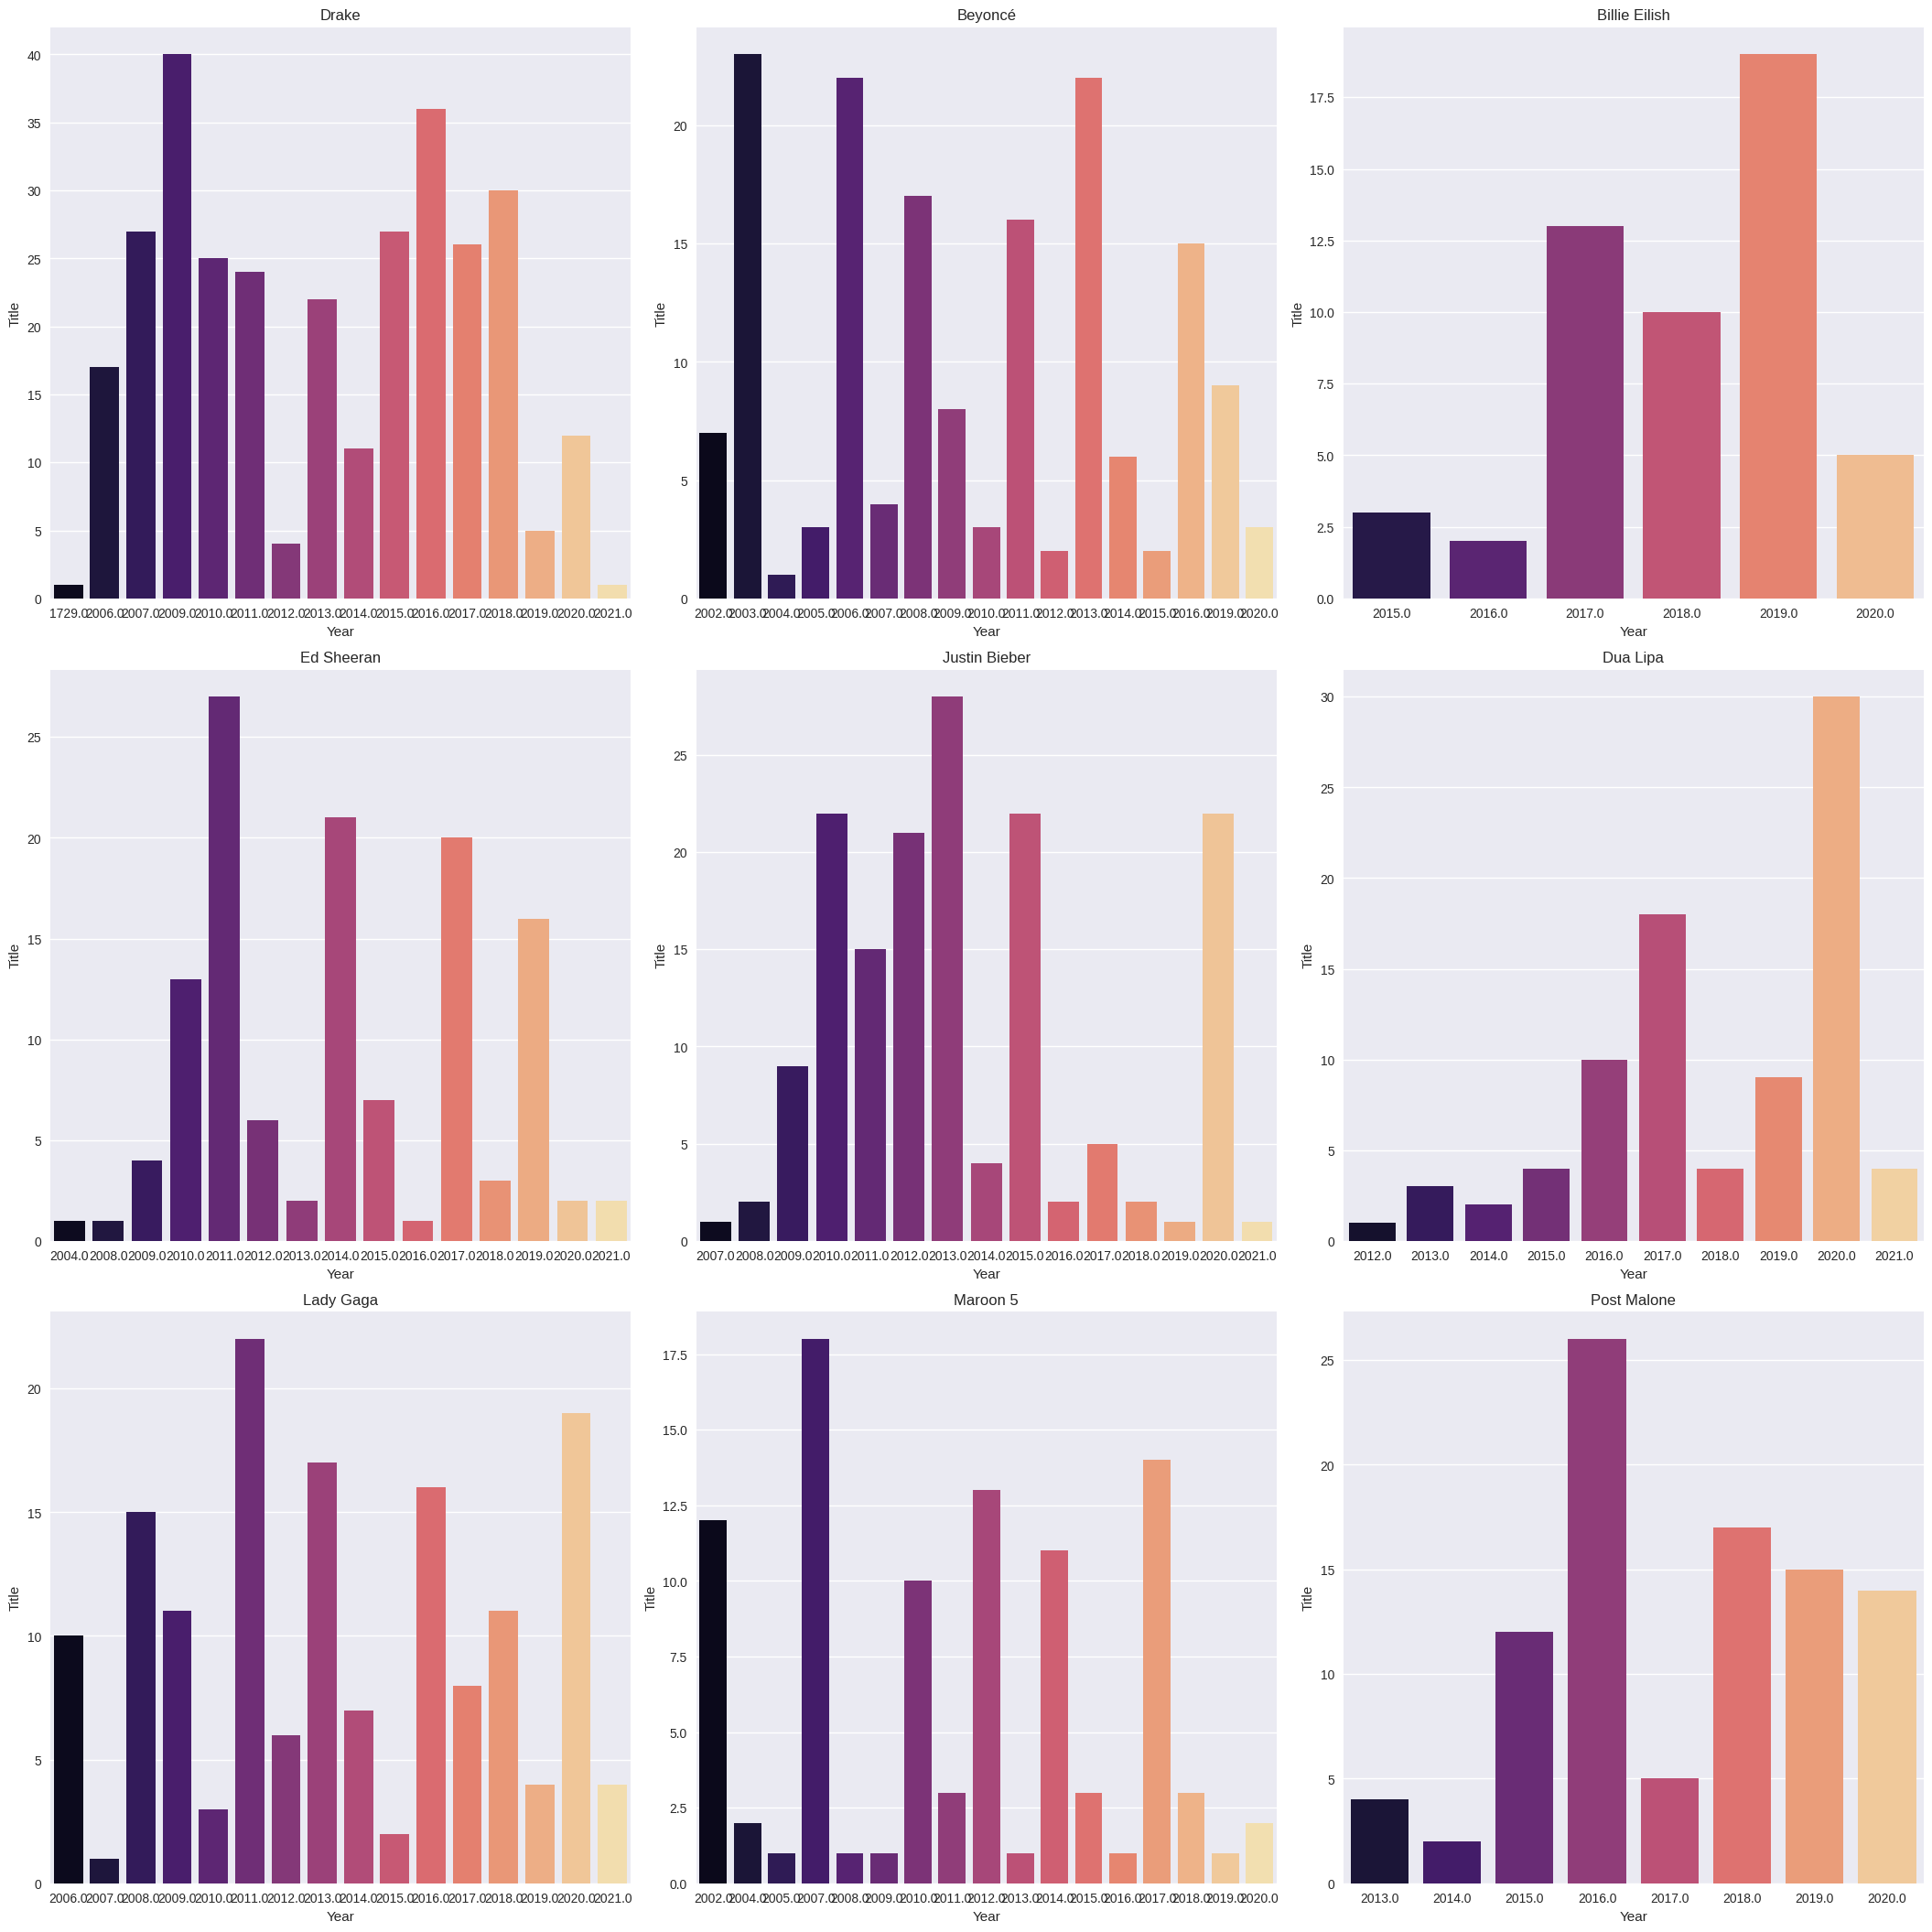

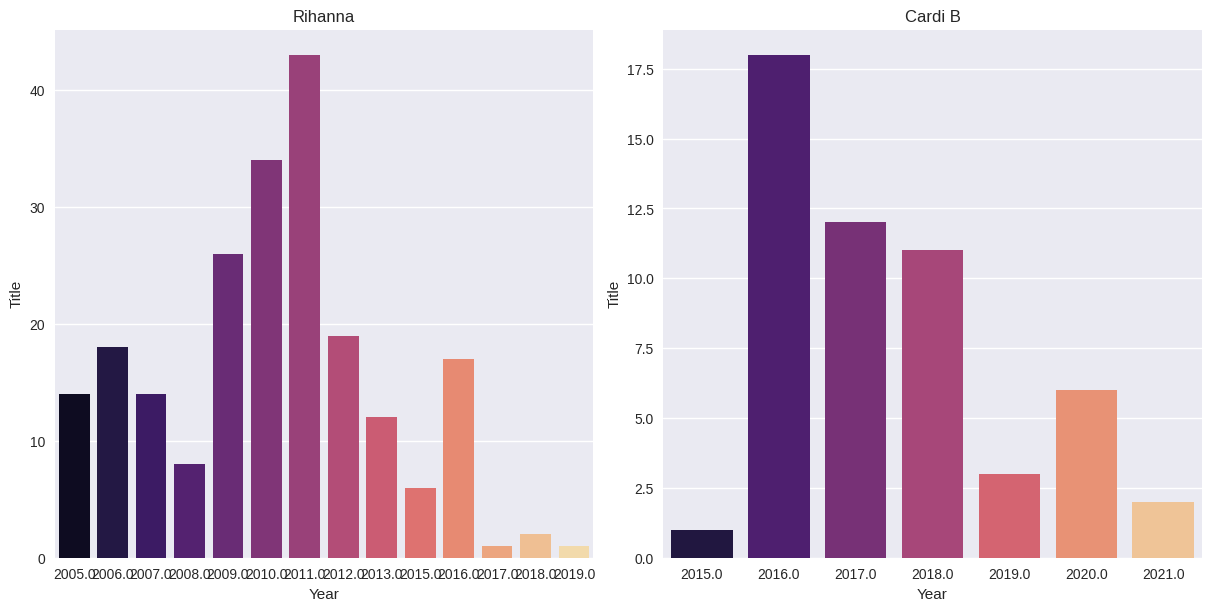

In [ ]:

df_temp=[]
name=df_main['Artist'].unique()
name=name[0:9]
num_plots = 9
total_cols = 3
total_rows = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_group[df_group['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(data=df_temp[i],x="Year", y="Title",ax=axs[row][pos],palette="magma")
    axs[row][pos].set_title(name[i])


name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(12, 6), constrained_layout=True)
plot = sns.barplot(data=df_temp[9],x="Year", y="Title",ax=axs[0], palette="magma")
axs[0].set_title(name[0])
plot = sns.barplot(data=df_temp[10],x="Year", y="Title",ax=axs[1], palette="magma")
axs[1].set_title(name[1])

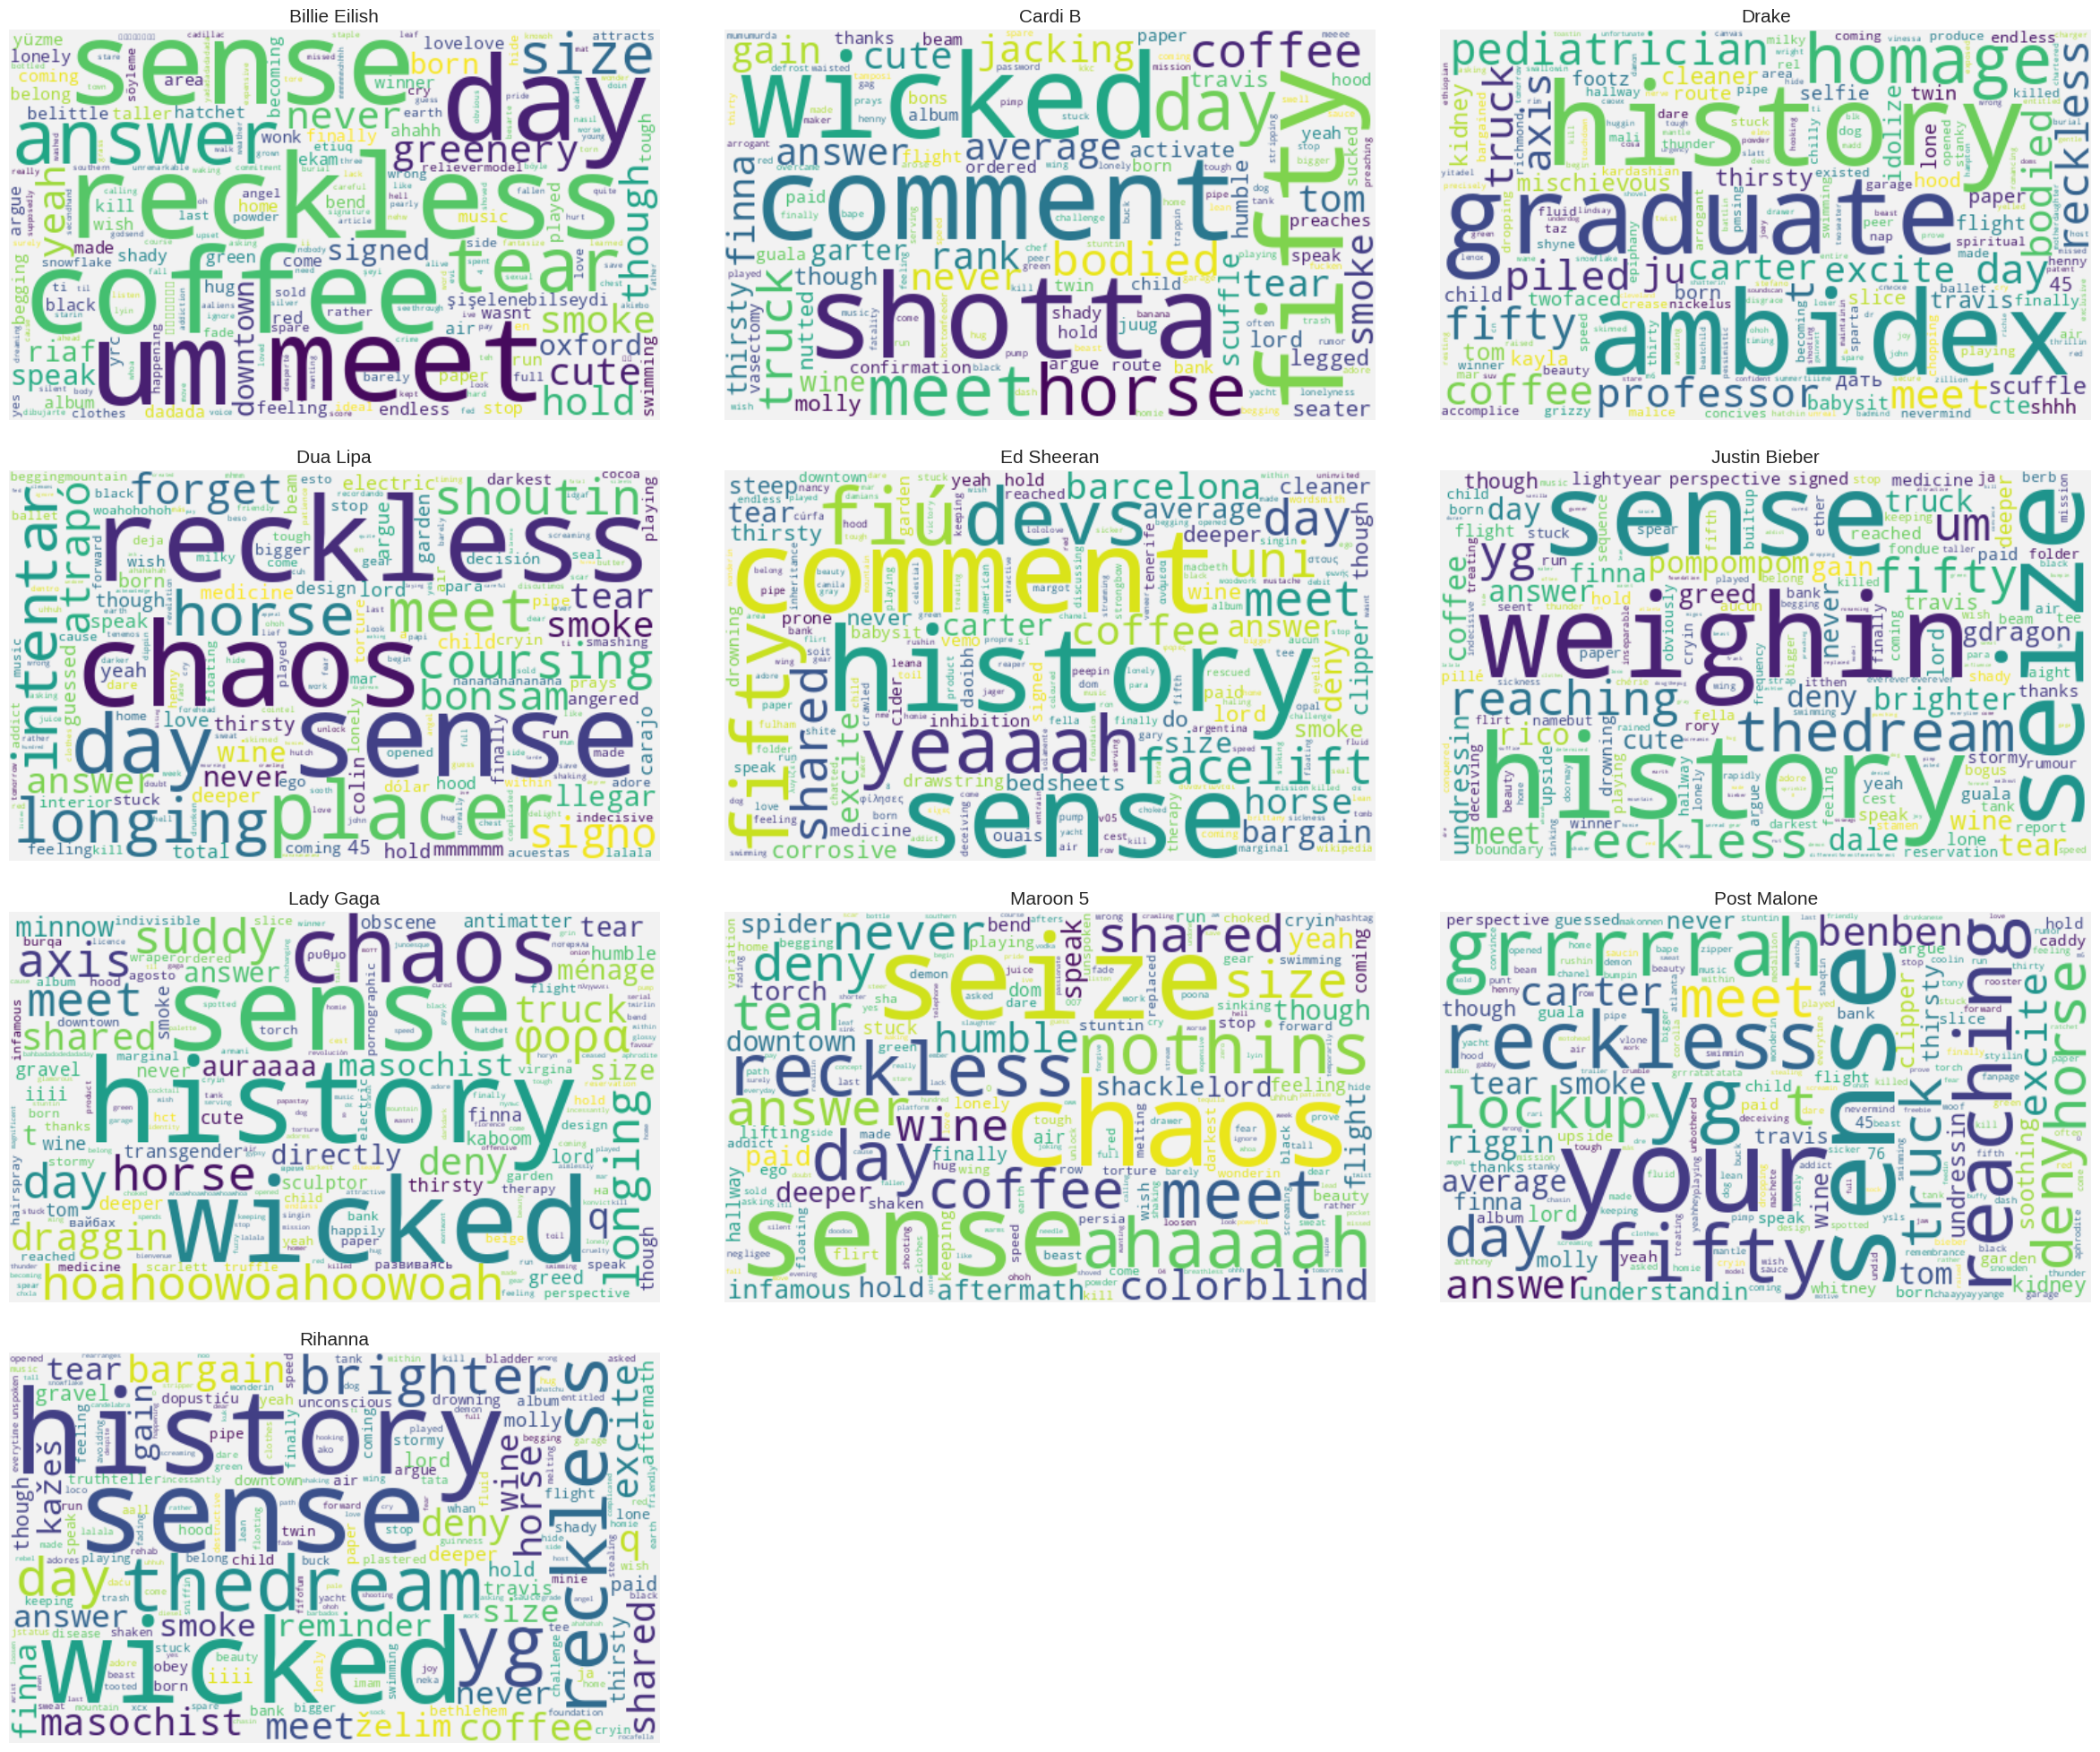

In [ ]:
from collections import Counter

def plot_wordcloud(df, row, col):
    wc = WordCloud(background_color="#F2F2F2", max_font_size=90, random_state=42,
                    width=500, height=300)
    fig = plt.figure(figsize=(30, 25))

    for index, value in enumerate(df.columns[1:]):
        # Combine all words from the column into a single string
        all_words = ' '.join(df[value].tolist())
        # Generate word frequencies
        word_freq = Counter(all_words.split())
        # Generate word cloud
        wc.generate_from_frequencies(word_freq)
        plt.subplot(row, col, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}", fontsize=15)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


vect_words=pd.read_csv('/content/drive/MyDrive/ArtistsCSV/artist_unique_wordss.csv')
plot_wordcloud(vect_words,4,3)


# Sentiment Analysis
>📌**Note** Now we will analyze the sentiment of each song

Analysis is done with a function SentimentIntensityAnalyzer

In [ ]:

#Create lists to store the different scores for each word
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:

        scores = sid.polarity_scores(df['Lyric'].iloc[i])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

In [ ]:
df_sentiment=setimentanalyzer(df_main)
df_sentiment.head(10)

Artist                      Title                                 Album  \
0  Drake                 God’s Plan                              Scorpion   
1  Drake             In My Feelings                              Scorpion   
2  Drake              Hotline Bling                                 Views   
3  Drake                  One Dance                                 Views   
4  Drake  Hold On, We’re Going Home                  Nothing Was the Same   
5  Drake              Know Yourself  If You’re Reading This It’s Too Late   
6  Drake               Back to Back                                   NaN   
7  Drake                     All Me                  Nothing Was the Same   
8  Drake                  Fake Love                             More Life   
9  Drake                  From Time                  Nothing Was the Same   

     Year        Date                                              Lyric  \
0  2018.0  2018-01-19  and they wishin' and wishin' and wishin' and w...   
1  2018.0  2018-06-29  drake trap trapmoneybenny this shit got me in ...   
2  2015.0  2015-07-25  you used to call me on my you used to you used...   
3  2016.0  2016-04-05  kyla baby i like your style   drake grips on y...   
4  2013.0  2013-08-07  produced by nineteen85 majid jordan  noah 40 s...   
5  2015.0  2015-02-13  part    hol' it yute hol' it hol' it hol' it h...   
6  2015.0  2015-07-29  oh man oh man oh man not again   yeah i learne...   
7  2013.0  2013-09-24  produced by key wane   aziz ansari i'm really ...   
8  2016.0  2016-10-23  i've been down so long it look like up to me t...   
9  2013.0  2013-09-24  jhené aiko what's up been a minute since we ki...   

                                               words  negative  neutral  \
0  [wishin, yeah, movin, calm, start, trouble, tr...     0.118    0.710   
1  [drake, trap, trapmoneybenny, shit, got, feeli...     0.160    0.679   
2  [used, call, yeah, cell, phone, latenight, nee...     0.020    0.867   
3  [kyla, baby, like, style, drake, grip, waist, ...     0.052    0.800   
4  [produced, nineteen85, majid, jordan, noah, 40...     0.041    0.821   
5  [part, hol, yute, sleepin, street, shaky, warr...     0.221    0.728   
6  [oh, man, yeah, learned, game, william, wesley...     0.113    0.743   
7  [produced, key, wane, aziz, ansari, im, really...     0.188    0.642   
8  [ive, long, look, like, got, fake, people, sho...     0.118    0.678   
9  [jhené, aiko, whats, minute, since, kicked, ca...     0.100    0.697   

   positive dominant_sentiment  dominant_sentiment_score  
0     0.172           Positive                     0.172  
1     0.161           Positive                     0.161  
2     0.113           Positive                     0.113  
3     0.149           Positive                     0.149  
4     0.137           Positive                     0.137  
5     0.051           Negative                     0.221  
6     0.143           Positive                     0.143  
7     0.170           Negative                     0.188  
8     0.203           Positive                     0.203  
9     0.202           Positive                     0.202

Now based on the above table we do the follwing analyisis where we find out the dominant sentiment of each artist

Text(0.5, 1.0, 'Cardi B')

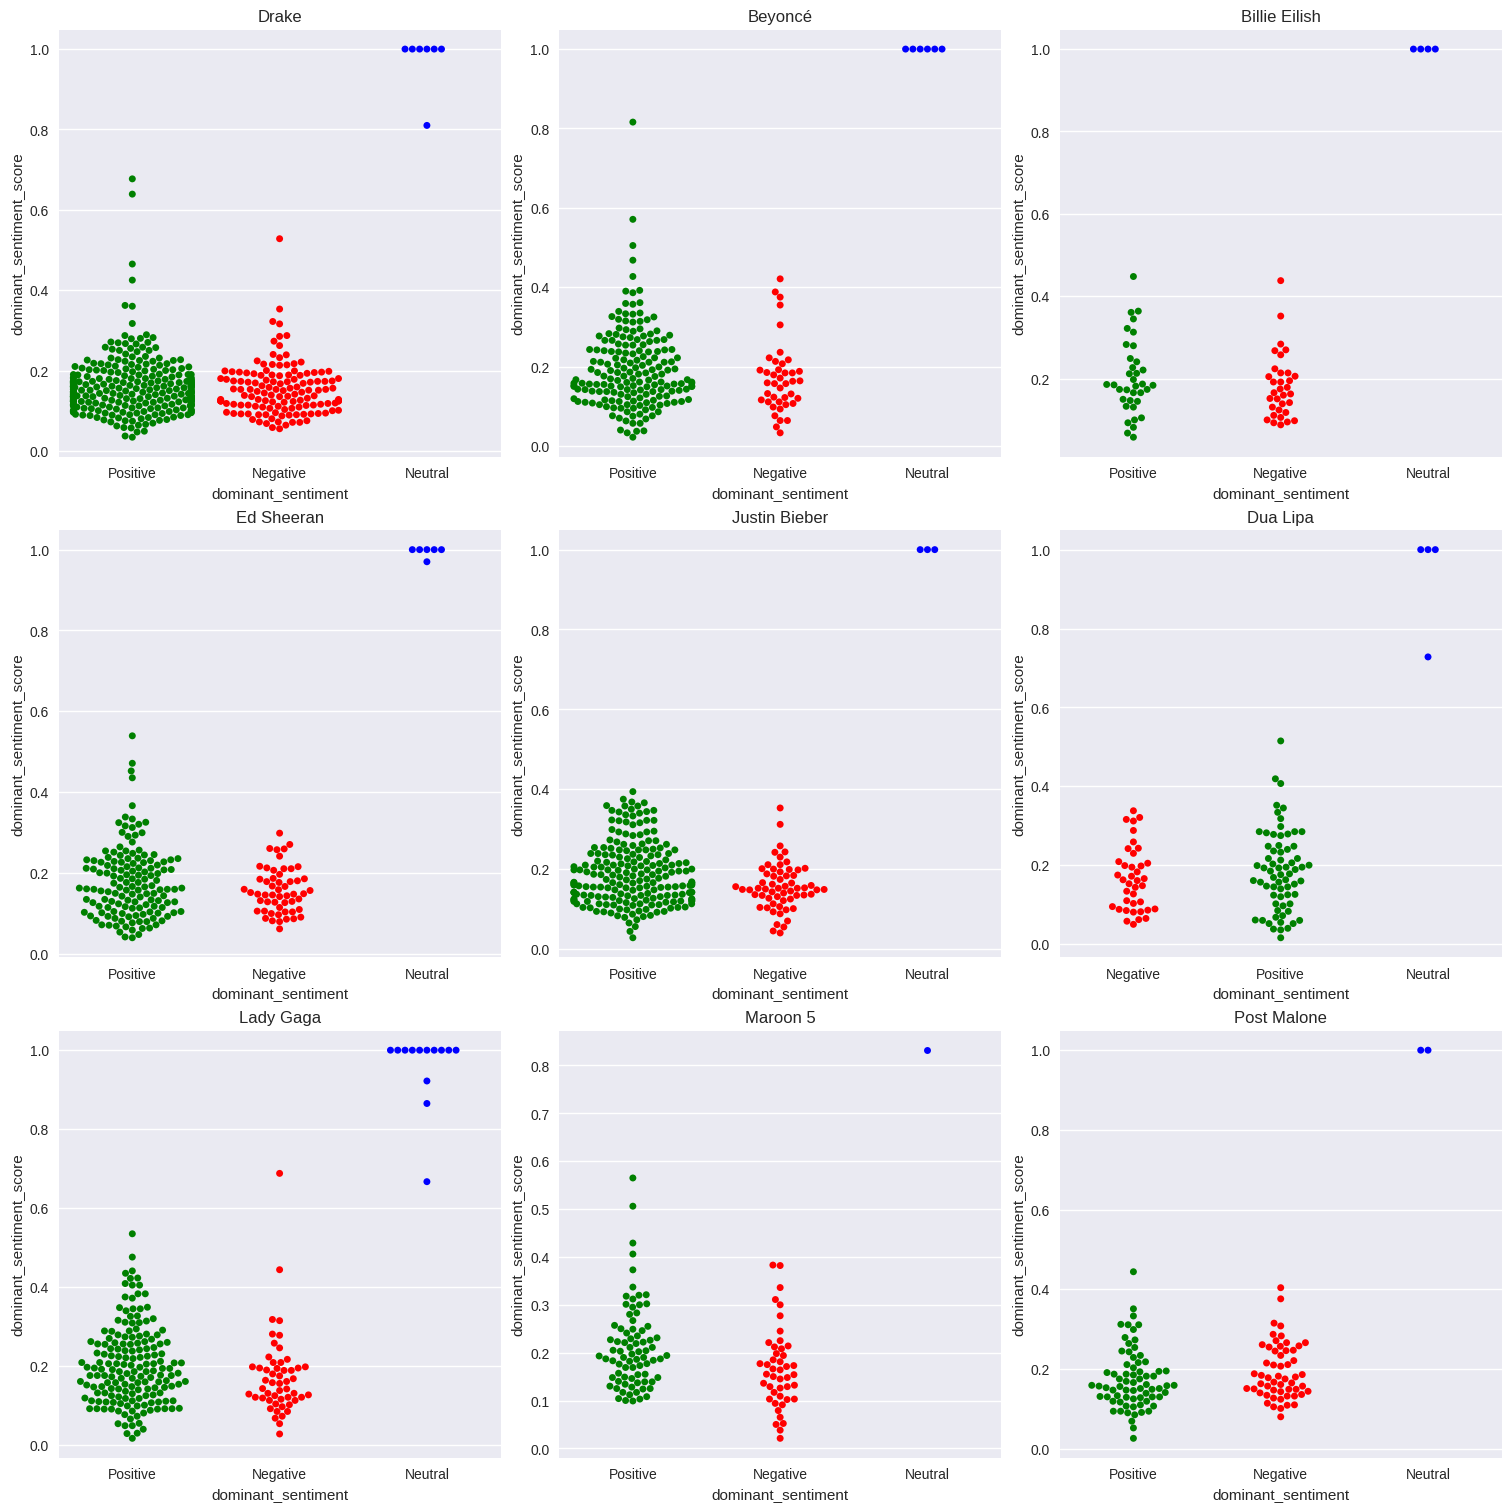

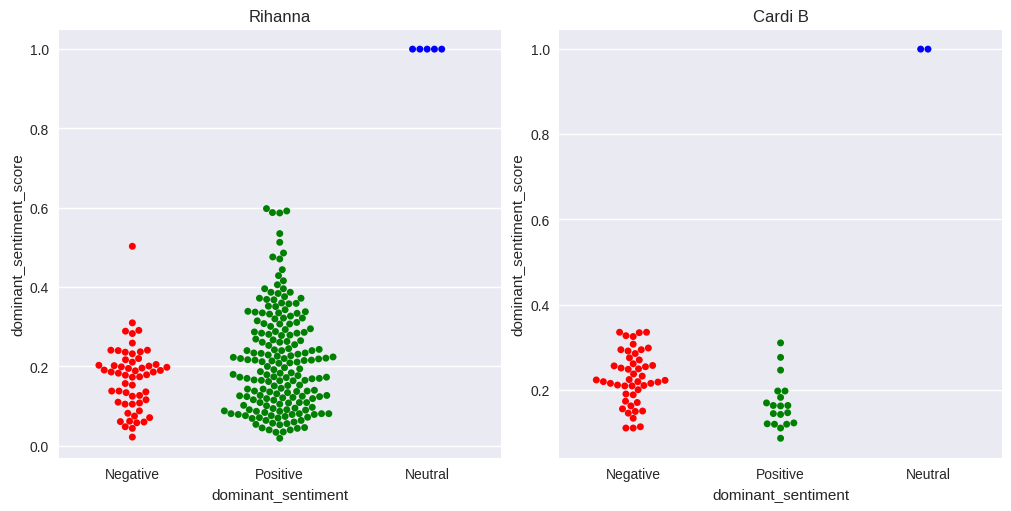

In [ ]:
# Define a color palette for each sentiment category
palette = {"Positive": "green", "Neutral": "blue", "Negative": "red"}

df_temp=[]
name=df_sentiment['Artist'].unique()
name=name[0:9]
num_plots = 9
total_cols = 3
total_rows = 3
#fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_sentiment[df_sentiment['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.swarmplot(data=df_temp[i], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[row][pos],palette=palette)
    axs[row][pos].set_title(name[i])

name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(10, 5), constrained_layout=True)
plot = sns.swarmplot(data=df_temp[9], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[0],palette=palette)
axs[0].set_title(name[0])
plot = sns.swarmplot(data=df_temp[10], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[1],palette=palette)
axs[1].set_title(name[1])

In [ ]:
# Group by 'Artist' and calculate the mean of the specified columns
means_df = df_sentiment.groupby('Artist').agg({
    'Year': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'positive': 'mean',
    'dominant_sentiment_score': 'mean'
}).reset_index()

# Rename the columns
means_df.columns = ['Artist', 'Year', 'negative', 'neutral', 'positive', 'dominant_sentiment_score']

# Print the resulting DataFrame
means_df


Artist         Year  negative   neutral  positive  \
0         Beyoncé  2009.638037  0.076330  0.752429  0.171277   
1   Billie Eilish  2018.057692  0.118247  0.746260  0.135493   
2         Cardi B  2017.433962  0.186130  0.698580  0.115275   
3           Drake  2012.016234  0.100579  0.761679  0.137748   
4        Dua Lipa  2018.023529  0.097405  0.755477  0.147117   
5      Ed Sheeran  2014.031746  0.088698  0.762545  0.148752   
6   Justin Bieber  2013.528662  0.075883  0.760289  0.163812   
7       Lady Gaga  2013.519231  0.090573  0.743423  0.166043   
8        Maroon 5  2010.804124  0.108960  0.729224  0.161856   
9     Post Malone  2017.178947  0.126906  0.733523  0.139563   
10        Rihanna  2010.255814  0.085448  0.734137  0.180419   

    dominant_sentiment_score  
0                   0.213424  
1                   0.236562  
2                   0.233768  
3                   0.171614  
4                   0.205505  
5                   0.196921  
6                   0.190673  
7                   0.237739  
8                   0.201720  
9                   0.195805  
10                  0.220859

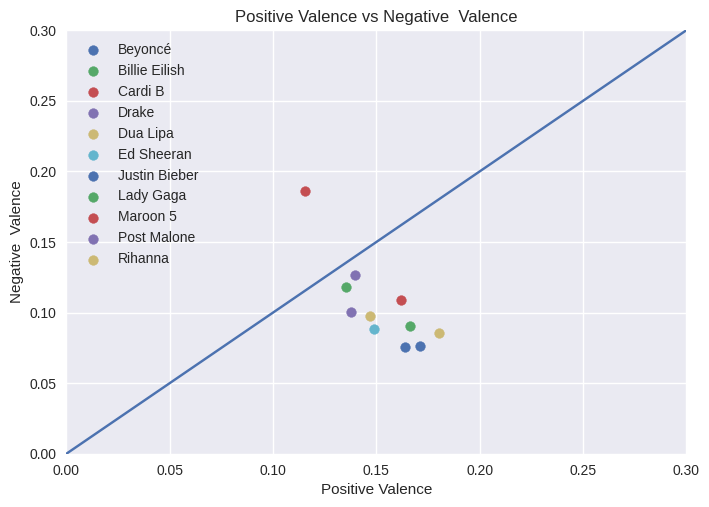

In [ ]:
x = np.linspace(0, 10, 1000)
for name, group in means_df.groupby('Artist'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.plot(x, x+0, linestyle='solid')
plt.title("Positive Valence vs Negative  Valence")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()#positive and negative region